In [2]:
import random
import numpy as np
from numpy.linalg import norm as vector_norm
import matplotlib.pyplot as plt
from itertools import product

import sys
sys.path.append('../modules')
from nsw.nsw_classifier import NSWClassifier
from nsw import rbf

In [2]:
G = NSWClassifier()

N = 2000
values = []
for i in range(N):
    p = np.array([random.random(), random.random()])
    cls = 1 if vector_norm(p) > 0.8 else 0
    values.append((p, cls))

G.build_navigable_graph(values, attempts=10)

Classifier graph is build in 10.866s


In [3]:
rich_cut = [(e, G.dist(G.nodes[e[0]].value, G.nodes[e[1]].value)) for e in G.cut]
rich_cut[:5], len(rich_cut)

([((7, 3), 0.8287836885577834),
  ((356, 252), 0.07705012571775306),
  ((83, 61), 0.10397691636850859),
  ((1066, 1016), 0.03061194996989014),
  ((288, 287), 0.04571907916727704)],
 442)

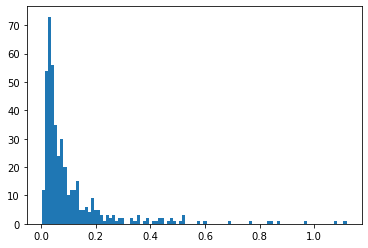

In [4]:
lengths = [e[1] for e in rich_cut]

plt.hist(lengths, bins=100)
plt.show()

In [5]:
smaller_cut = [e for e in rich_cut if e[1] < .1]
len(smaller_cut)

311

In [3]:
from itertools import product

def plot_potential(mn, mx, f, eps, width=51):
    xi = yi = np.linspace(mn, mx, width)
    pairs = np.array(list(product(xi, yi)))
    test = f(pairs[0], eps)
    print(type(test))
    if type(test) == float or type(test) == np.float64:
        print('flat')
        zi = np.array([f(pair, eps) for pair in pairs]).reshape((width, -1))
        mnv, mxv = zi.min(), zi.max()
        mnv, mxv = -max(abs(mnv), abs(mxv)), max(abs(mnv), abs(mxv))
        fig, ax = plt.subplots(figsize=(15, 15))
        c = ax.pcolormesh(xi, yi, zi, cmap='RdBu', vmin=mnv, vmax=mxv)
        ax.set_title('class edge')
        # set the limits of the plot to the limits of the data
        ax.axis([xi.min(), xi.max(), yi.min(), yi.max()])
        fig.colorbar(c, ax=ax)
        plt.show()
    else:
        print('field')
        zi = np.array([f(pair) for pair in pairs]).reshape((-1, 2))
        fig, ax = plt.subplots(figsize=(15, 15))
        c = ax.quiver(pairs[:, 0], pairs[:, 1], zi[:,0], zi[:, 1])
        ax.set_title('class edge')
        # set the limits of the plot to the limits of the data
        ax.axis([xi.min(), xi.max(), yi.min(), yi.max()])
        plt.show()

## Built-in RBF tool

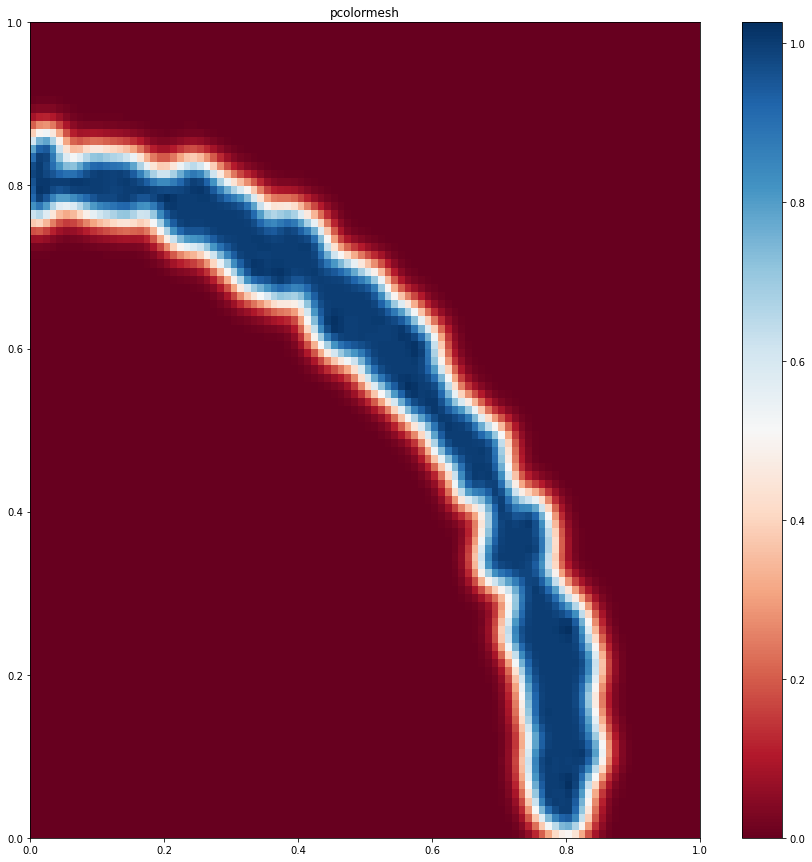

In [7]:
f = rbf.get_builtin_potential_function(G, smaller_cut)
xi = yi = np.linspace(0, 1, 101)
pairs = np.array(list(product(xi, yi)))
zi = f(pairs[:, 0], pairs[:, 1]).reshape((101, -1))
fig, ax = plt.subplots(figsize=(15, 15))
c = ax.pcolormesh(xi, yi, zi, cmap='RdBu')
ax.set_title('pcolormesh')
# set the limits of the plot to the limits of the data
ax.axis([xi.min(), xi.max(), yi.min(), yi.max()])
fig.colorbar(c, ax=ax)
plt.show()

## Repeat using self-implemented

<class 'numpy.float64'>
flat


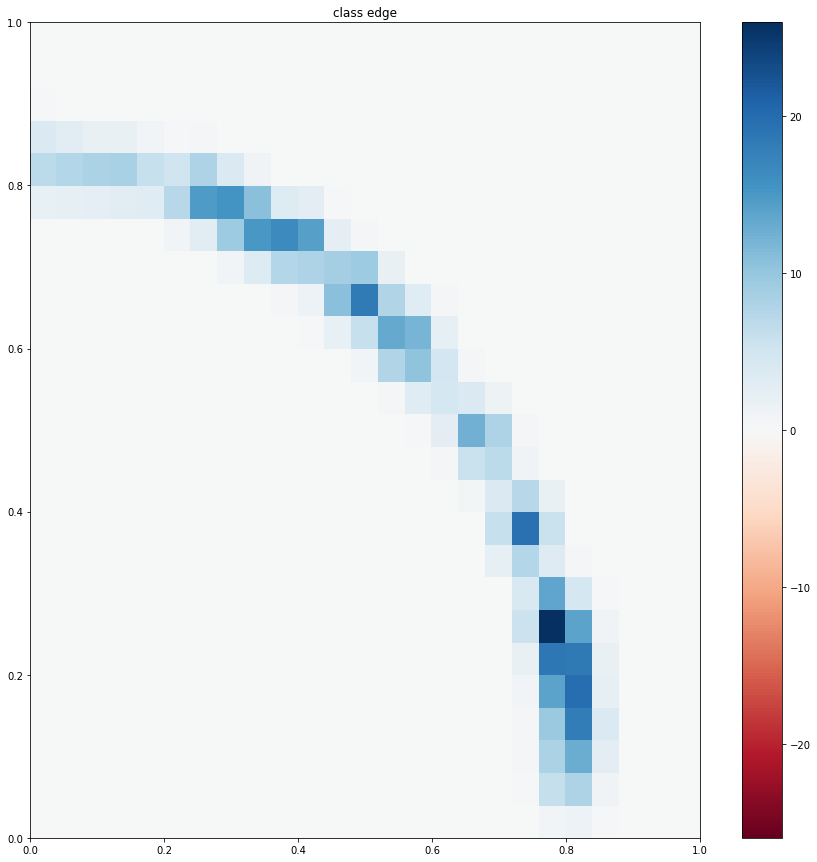

In [12]:
f = rbf.get_rbf_potential_function(G, smaller_cut)
plot_potential(0., 1., f, 30, 26)

<class 'numpy.float64'>
flat


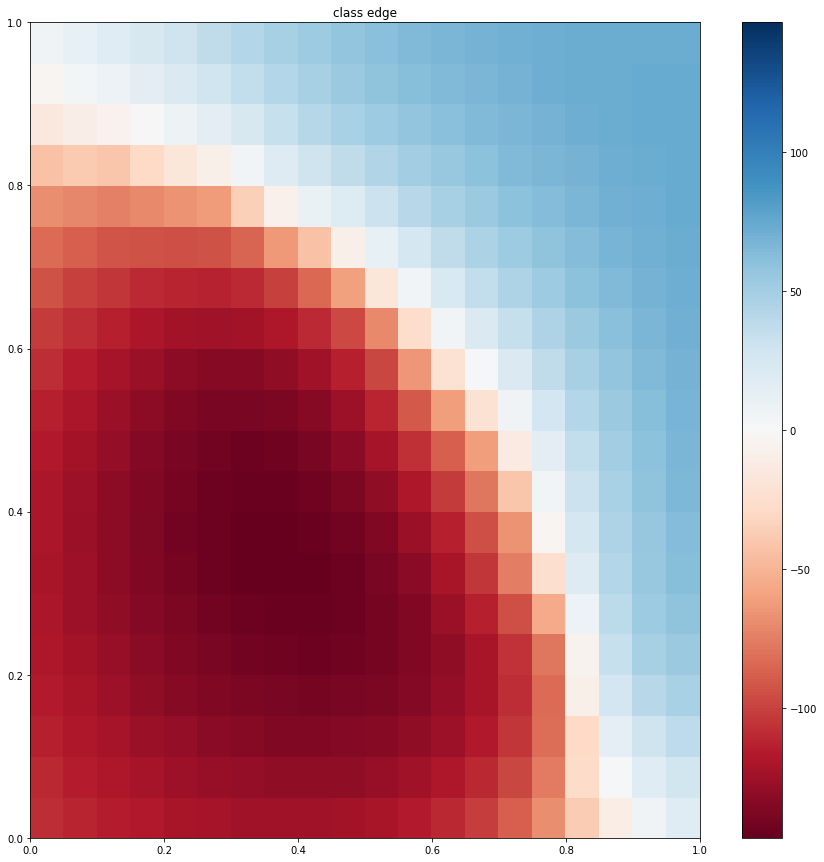

In [13]:
f = rbf.get_cos_potential_function(G, smaller_cut)
plot_potential(0., 1., f, 10, 21)

<class 'numpy.float64'>
flat


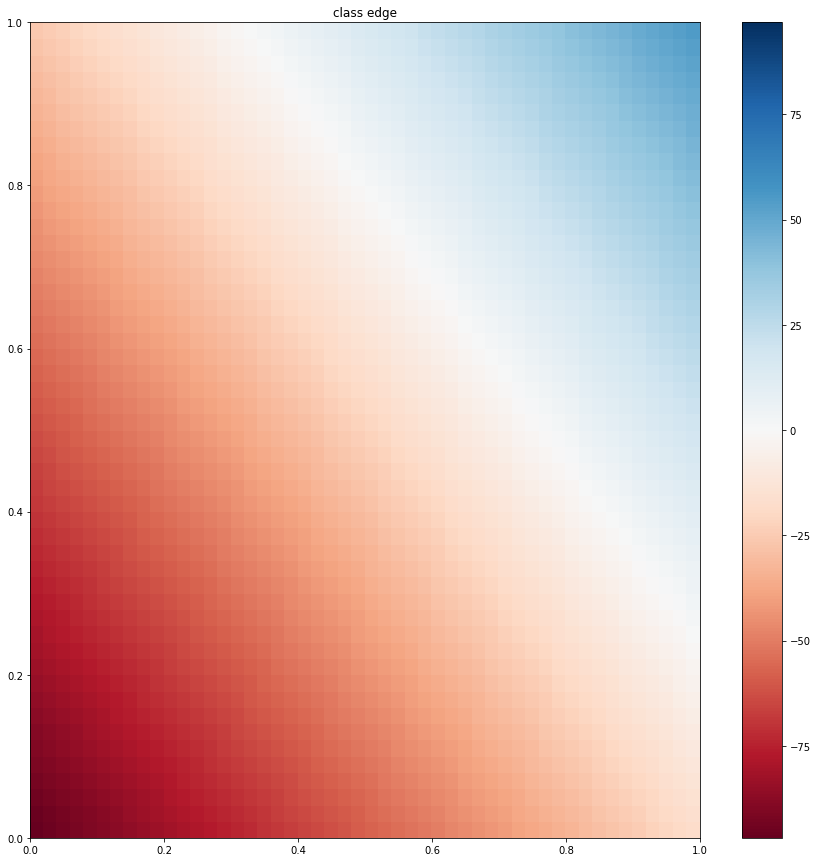

In [14]:
f = rbf.get_simple_dot_potential_function(G, smaller_cut)
plot_potential(0., 1., f, 10, 51)

<class 'numpy.float64'>
flat


../modules\nsw\rbf.py:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


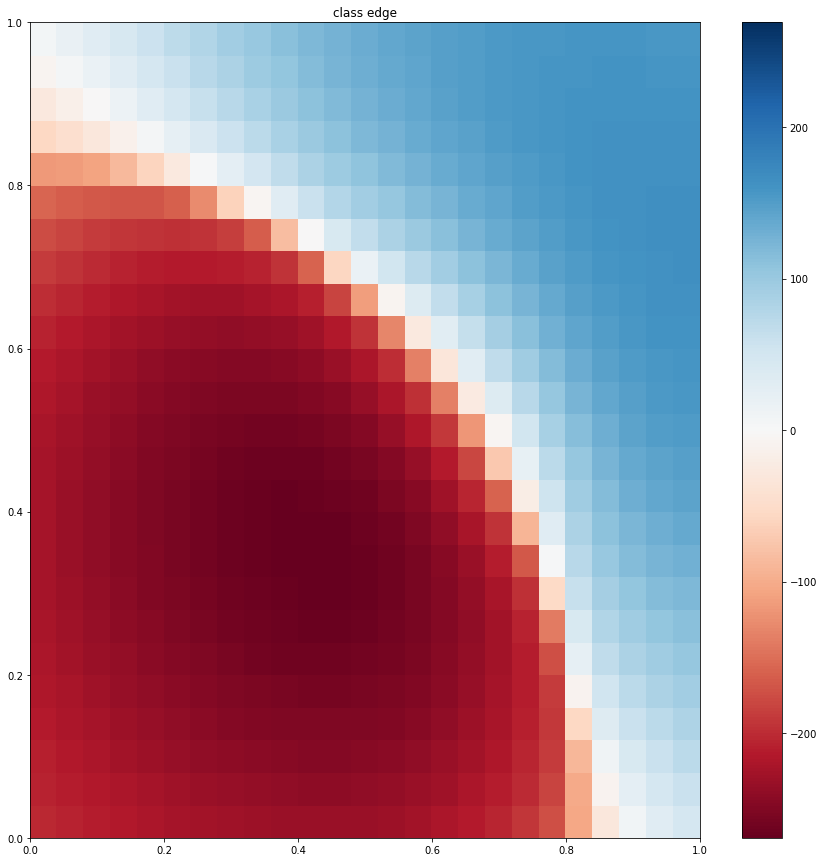

In [15]:
f = rbf.get_amplified_cos_potential_function(G, smaller_cut)
plot_potential(0., 1., f, 10, 26)

In [16]:
G2 = NSWClassifier()

N = 2000
values = []
for i in range(N):
    p = np.array([2. * random.random() - 1., 2. * random.random() - 1.])
    cls = 1 if vector_norm(p) > 0.8 else 0
    if random.random() > .96:
        cls = 1 - cls
    values.append((p, cls))

G2.build_navigable_graph(values, attempts=10)
new_rich_cut = [(e, G2.dist(G2.nodes[e[0]].value, G2.nodes[e[1]].value)) for e in G2.cut]
new_smaller_cut = [e for e in new_rich_cut if e[1] < .1]

Classifier graph is build in 8.961s


<class 'numpy.float64'>
flat


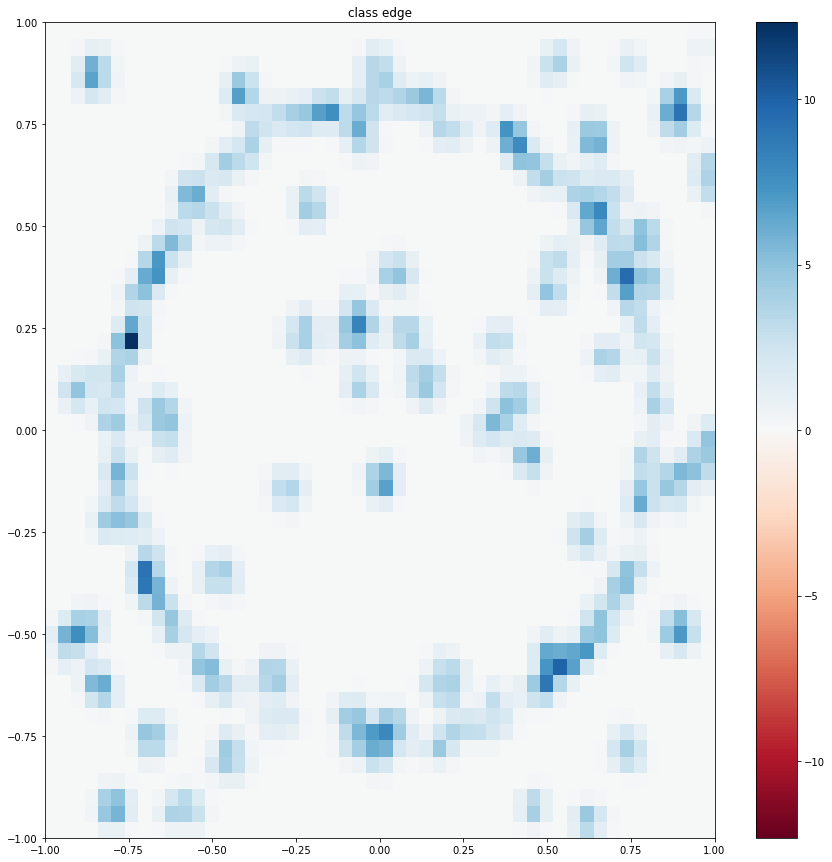

In [17]:
f = rbf.get_rbf_potential_function(G2, new_smaller_cut)
plot_potential(-1., 1., f, 30, 51)

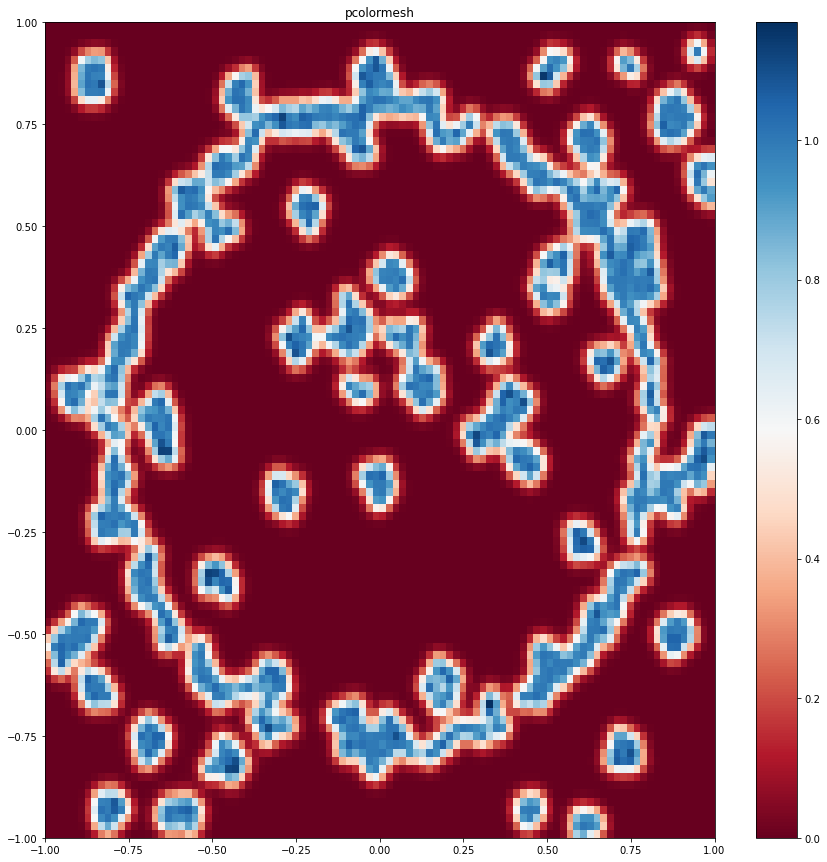

In [18]:
f = rbf.get_builtin_potential_function(G2, new_smaller_cut)

xi = yi = np.linspace(-1, 1, 101)
pairs = np.array(list(product(xi, yi)))
zi = f(pairs[:, 0], pairs[:, 1]).reshape((101, -1))
fig, ax = plt.subplots(figsize=(15, 15))
c = ax.pcolormesh(xi, yi, zi, cmap='RdBu')
ax.set_title('pcolormesh')
# set the limits of the plot to the limits of the data
ax.axis([xi.min(), xi.max(), yi.min(), yi.max()])
fig.colorbar(c, ax=ax)
plt.show()

<class 'numpy.float64'>
flat


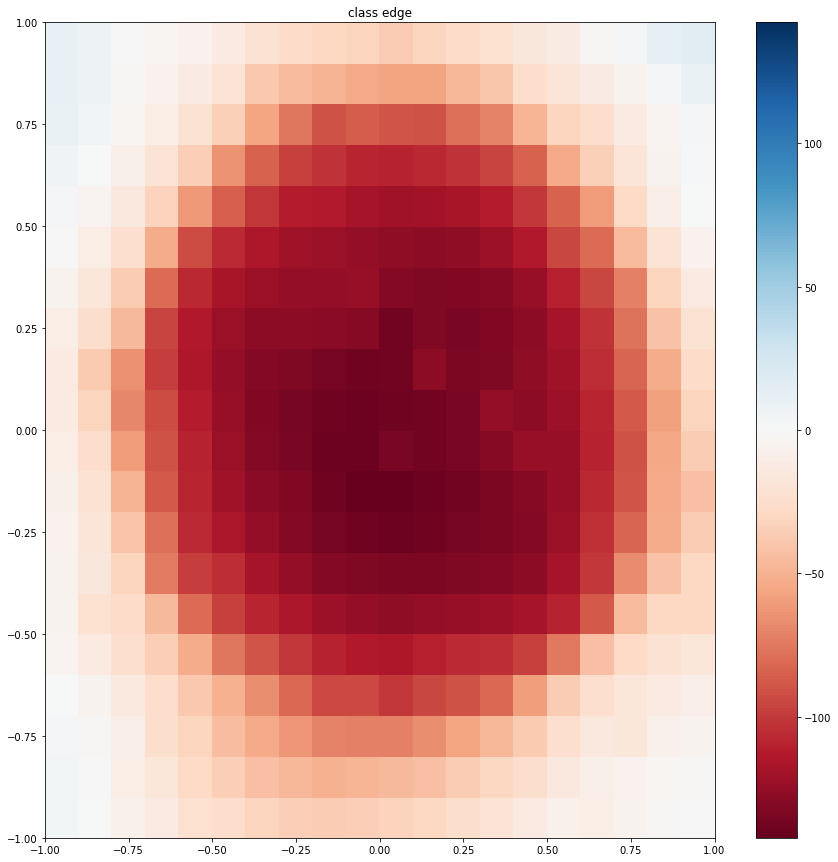

In [19]:
f = rbf.get_cos_potential_function(G2, new_smaller_cut)
plot_potential(-1., 1., f, 10, 21)

<class 'numpy.float64'>
flat


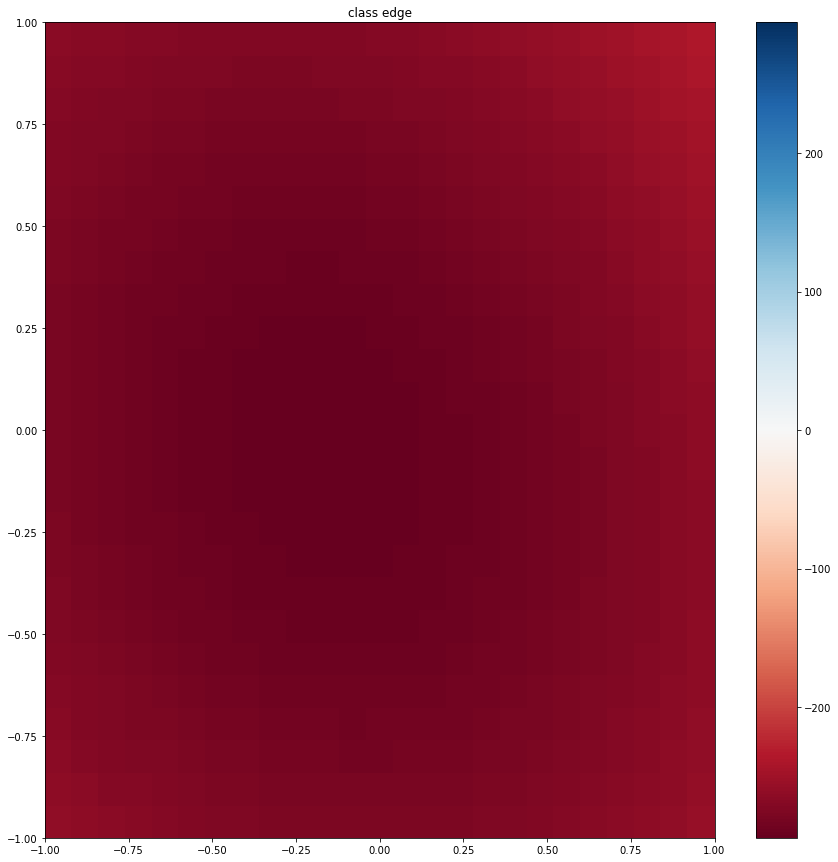

In [20]:
f = rbf.get_simple_dot_potential_function(G2, new_smaller_cut)
plot_potential(-1., 1., f, 10, 26)

<class 'numpy.float64'>
flat


../modules\nsw\rbf.py:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


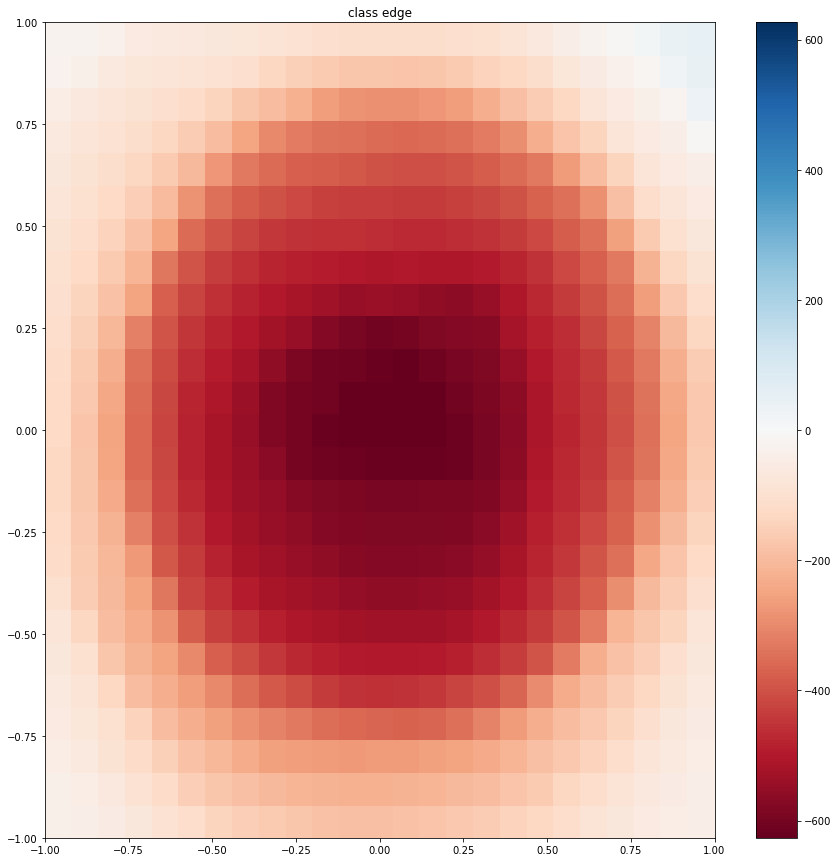

In [21]:
f = rbf.get_amplified_cos_potential_function(G2, new_smaller_cut)
plot_potential(-1., 1., f, 10, 26)

<class 'numpy.ndarray'>
field


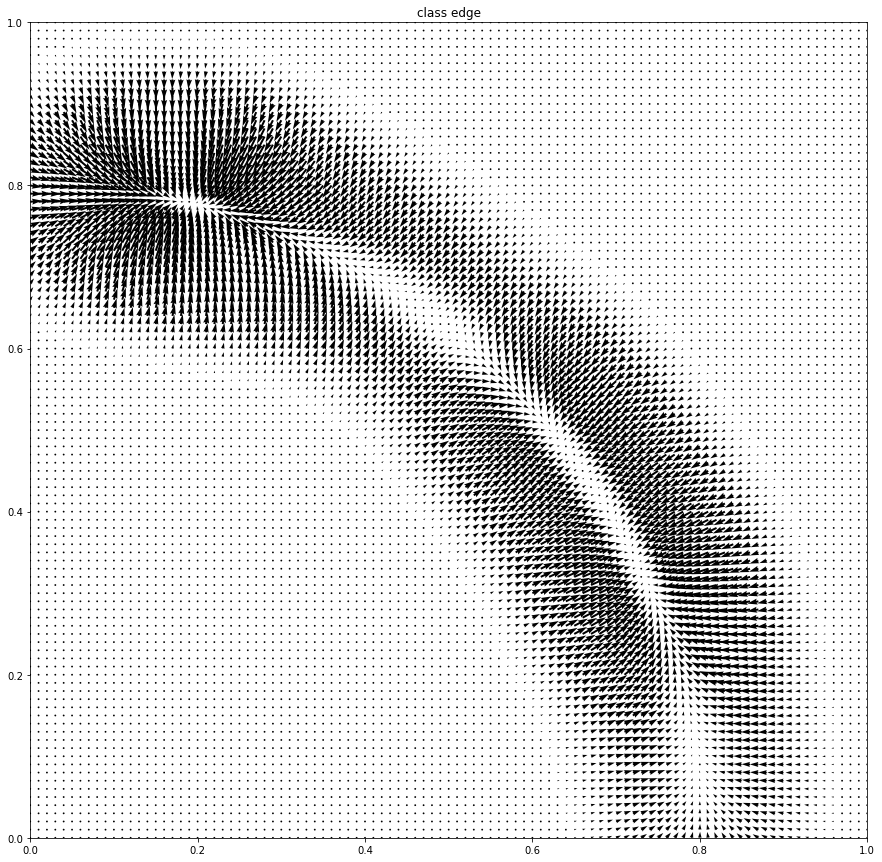

In [22]:
f = rbf.get_gaussian_rbf_grad(G, smaller_cut)
plot_potential(0., 1., f, 10, 101)

<class 'numpy.ndarray'>
field


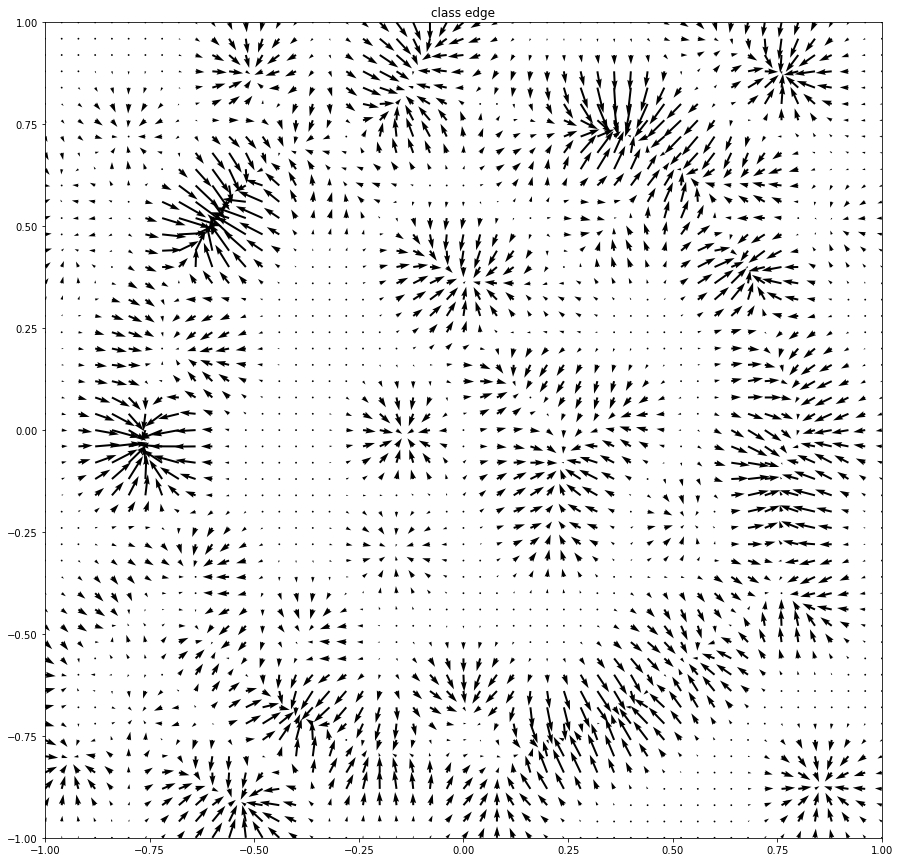

In [23]:
f = rbf.get_gaussian_rbf_grad(G2, new_smaller_cut)
plot_potential(-1., 1., f, 10, 51)

Classifier graph is build in 15.566s


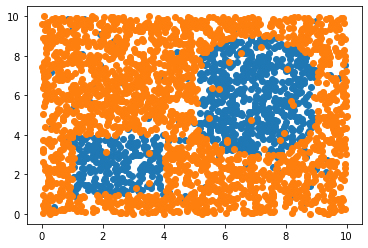

In [5]:
G3 = NSWClassifier()

N = 3000
values = []
for i in range(N):
    p = np.array([random.random() * 10., random.random() * 10.])
    cls = 0
    if 1 < p[0] < 4 and 1 < p[1] < 4:
        cls = 1
    if (p[0] - 7) ** 2 + (p[1] - 7) ** 2 < 4:
        cls = 1
    if (p[0] - 7) ** 2 + (p[1] - 5) ** 2 < 4:
        cls = 1
    if random.random() > .97:
        cls = 1 - cls
    values.append((p, cls))

G3.build_navigable_graph(values, attempts=10)

pos, neg = np.array([v[0] for v in values if v[1] == 1]), np.array([v[0] for v in values if v[1] == 0])
plt.scatter(pos[:, 0], pos[:, 1])
plt.scatter(neg[:, 0], neg[:, 1])
plt.show()

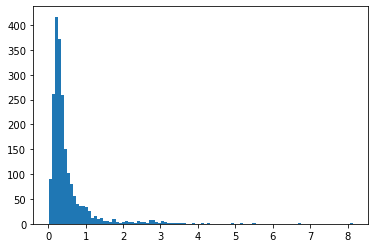

1554


In [6]:
rich_cut3 = [(e, G3.dist(G3.nodes[e[0]].value, G3.nodes[e[1]].value)) for e in G3.cut]
lengths = [e[1] for e in rich_cut3]

plt.hist(lengths, bins=100)
plt.show()

smaller_cut3 = [e for e in rich_cut3 if e[1] < .5]
print(len(smaller_cut3))

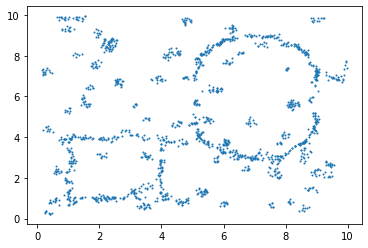

In [7]:
pts = np.array([(G3.nodes[v[0][0]].value + G3.nodes[v[0][1]].value) / 2 for v in smaller_cut3])
plt.scatter(pts[:, 0], pts[:, 1], s=1)
plt.show()

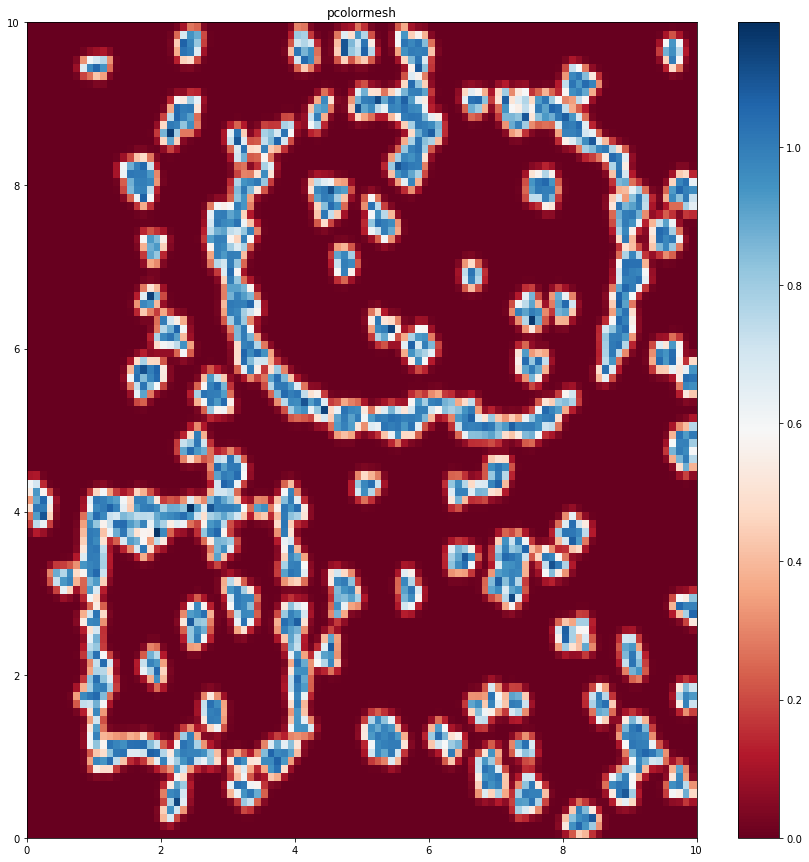

In [34]:
f = rbf.get_builtin_potential_function(G3, smaller_cut3, 0.1)

xi = yi = np.linspace(0, 10, 101)
pairs = np.array(list(product(xi, yi)))
zi = f(pairs[:, 0], pairs[:, 1]).reshape((101, -1))
fig, ax = plt.subplots(figsize=(15, 15))
c = ax.pcolormesh(xi, yi, zi, cmap='RdBu')
ax.set_title('pcolormesh')
# set the limits of the plot to the limits of the data
ax.axis([xi.min(), xi.max(), yi.min(), yi.max()])
fig.colorbar(c, ax=ax)
plt.show()

<class 'numpy.float64'>
flat


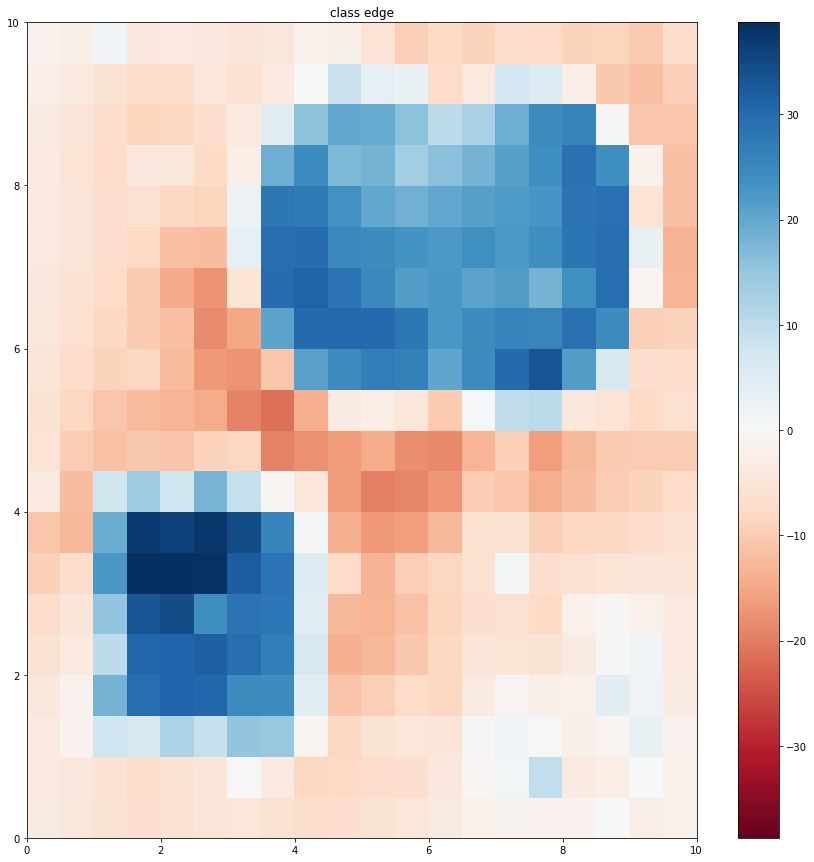

In [35]:
f = rbf.get_cos_potential_function(G3, smaller_cut3)
plot_potential(0., 10., f, 10, 21)

In [ ]:
f = rbf.get_amplified_cos_potential_function(G3, smaller_cut3)
plot_potential(0., 10., f, 10, 101)

<class 'numpy.float64'>
flat
